# Hands-on 5: Data-Engineering II - Data Visualization

*Note: This lab session is graded. Complete all the exercises, run your code and upload the ipynb file under assignment **Hands-on: Data Visualization**

**Deadline is Today (02/14), 11:59 PM**

## Data Collection for Weather Analysis 

Last week, we scraped the EstesPark website and collected data for the month of January 2023. 
https://www.estesparkweather.net/archive_reports.php?date=202301. 

Today, we will try to perform data analysis where we extract descriptive statistics and apply data visualization techniques to gain some insights

We would need the following Python libraries : 

**Pandas:** This is the library for dealing with Tablular data. Also allows some statistical opetations. 

**NumPy/Scipy:** Library for statistical analysis

**Matplotlib:** For plotting data 

## 0. Install and Import Libraries

In [135]:
# Check if beautifulsoup and pandas are already installed
# If not, install it and then import
try:
    import pandas as pd
    import numpy as np
    import scipy
    from matplotlib import pyplot as plt
    print ("Imported all libraries successfully...")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} scipy
    print ("Some libraries not found, installing...")

Imported all libraries successfully...


## 1. Load the EstesPark data we collected

If you did the last hands-on, you should have the data on your local folder by the name **EstesPark_Weather_January_2023.csv**. If you do not have it, you could download it from **Canvas->Files->Week6->EstesPark_Weather_January_2023.csv**

Try to open the file in Excel / Numbers / Open office (just doube click on it to open with your default app for numbers).

In [136]:
# Before starting, let's tell jupyter not to ignore any output that is supposed to be printed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

estes_park_df = pd.read_csv("EstesPark_Weather_January_2023.csv")

estes_park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               32 non-null     int64  
 1   Average and Extremes     32 non-null     object 
 2   Average temperature      32 non-null     float64
 3   Average humidity         32 non-null     float64
 4   Average dewpoint         32 non-null     float64
 5   Average barometer        32 non-null     float64
 6   Average windspeed        32 non-null     float64
 7   Average gustspeed        32 non-null     float64
 8   Average direction        32 non-null     object 
 9   Rainfall for month       32 non-null     object 
 10  Rainfall for year        32 non-null     object 
 11  Maximum rain per minute  32 non-null     object 
 12  Maximum temperature      32 non-null     object 
 13  Minimum temperature      32 non-null     object 
 14  Maximum humidity         32 

Print a few rows.

In [137]:
estes_park_df.head()

,Unnamed: 0,Average and Extremes,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,...,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
0,0,Jan 1,28.5,83.0,23.9,29.7,3.0,5.0,76° (ENE),0.09 in.,...,0.01 in. on day 01 at time 12:49,36.1°F on day 01 at time 12:51,23.5°F on day 01 at time 22:31,94% on day 01 at time 00:00,64% on day 01 at time 12:41,29.747 in. on day 01 at time 20:01,29.612 in. on day 01 at time 01:09,12.7 mph on day 01 at time 14:58,16.1 mph from 029 °(NNE) on day 01 at time 1...,36.1°F on day 01 at time 12:51
1,1,Jan 2,20.4,92.0,18.5,29.7,2.1,3.4,68° (ENE),0.09 in.,...,0.00 in. on day 02 at time 23:59,23.8°F on day 02 at time 01:35,17.3°F on day 02 at time 23:56,94% on day 02 at time 01:04,90% on day 02 at time 23:59,29.806 in. on day 02 at time 23:57,29.654 in. on day 02 at time 08:24,5.8 mph on day 02 at time 23:31,10.4 mph from 081 °( E ) on day 02 at time 2...,23.8°F on day 02 at time 01:35
2,2,Jan 3,21.8,68.0,12.1,29.8,6.1,9.2,267° ( W ),0.15 in.,...,0.01 in. on day 03 at time 11:51,31.2°F on day 03 at time 11:44,11.3°F on day 03 at time 07:53,91% on day 03 at time 08:08,48% on day 03 at time 23:57,29.871 in. on day 03 at time 23:49,29.772 in. on day 03 at time 11:15,18.4 mph on day 03 at time 20:23,28.8 mph from 267 °( W ) on day 03 at time 2...,31.2°F on day 03 at time 11:44
3,3,Jan 4,23.1,46.0,5.4,30.0,16.0,23.5,258° (WSW),0.15 in.,...,0.00 in. on day 04 at time 23:59,27.2°F on day 04 at time 14:06,19.8°F on day 04 at time 07:34,53% on day 04 at time 11:47,34% on day 04 at time 14:18,30.175 in. on day 04 at time 23:14,29.831 in. on day 04 at time 06:30,28.8 mph on day 04 at time 11:48,41.4 mph from 172 °( S ) on day 04 at time 1...,27.2°F on day 04 at time 14:06
4,4,Jan 5,33.3,39.0,10.7,30.0,10.7,15.0,248° (WSW),0.15 in.,...,0.00 in. on day 05 at time 23:59,41.4°F on day 05 at time 13:42,19.5°F on day 05 at time 05:55,57% on day 05 at time 09:29,27% on day 05 at time 23:00,30.163 in. on day 05 at time 00:03,29.830 in. on day 05 at time 22:43,21.9 mph on day 05 at time 19:28,31.1 mph from 267 °( W ) on day 05 at time 2...,41.4°F on day 05 at time 13:42


## 1.1. What kind of variables do we have?

Check the output from the info method above. There are two kinds of columns (variables)

- Numerical (int, float): Average temperature, Average humidity, Average dewpoint, ...
- Categorical (strings): Date

## 2. Print column names and access column data?
Say you want the average_temperature column as a list type object 

In [138]:
column_names = estes_park_df.columns
print (column_names)

average_temperature = estes_park_df["Average temperature"]
print (average_temperature)


Index(['Unnamed: 0', 'Average and Extremes', 'Average temperature',
       'Average humidity', 'Average dewpoint', 'Average barometer',
       'Average windspeed', 'Average gustspeed', 'Average direction',
       'Rainfall for month', 'Rainfall for year', 'Maximum rain per minute',
       'Maximum temperature', 'Minimum temperature', 'Maximum humidity',
       'Minimum humidity', 'Maximum pressure', 'Minimum pressure',
       'Maximum windspeed', 'Maximum gust speed', 'Maximum heat index'],
      dtype='object')
0     28.5
1     20.4
2     21.8
3     23.1
4     33.3
5     34.2
6     32.3
7     35.4
8     36.0
9     38.1
10    30.3
11    32.5
12    42.9
13    42.9
14    31.1
15    30.7
16    22.6
17    20.7
18    22.9
19    14.4
20    13.7
21    22.1
22    20.2
23    19.9
24    17.6
25    20.8
26    26.8
27    21.0
28    -0.8
29    -0.1
30    16.6
31    24.9
Name: Average temperature, dtype: float64


## 3. Descriptive Stats using df.describe() method

In [139]:
average_temperature.describe()

count    32.000000
mean     24.900000
std      10.212927
min      -0.800000
25%      20.350000
50%      23.000000
75%      32.350000
max      42.900000
Name: Average temperature, dtype: float64

**Insights:**
The range of the temperature is: [-0.8, 42.9]. Also, the mean temperature is below freezing point (~25F) on an average with a standard deviation of 10.21F. Estes Park was  generally cold during the month of January 2023. 

### 3.1. Frequency plot using df.hist() method

Pandas DataFrames already provide a plotting function that can bin our data into frequency buckets and then plot frequencies. Frequency plots are called **histograms**.

<AxesSubplot: >

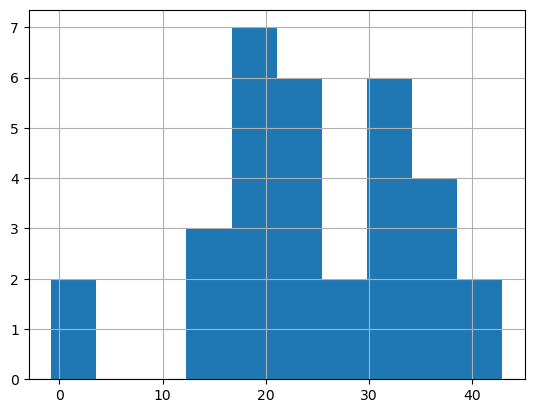

In [140]:
average_temperature.hist(bins=10)

#### 3.1.1 What does the histogram represent?

On x-axis, we have the values of temperature binned into 10 bins. Based on the range i.e., [-0.8, 42.9] and the bin size of 10, the bins are:

- bin1: [-0.8,3.57]
- bin2: [3.58,7.94]
- ...
- bin10: [38.53,42.9]

The y-axis represents number of times temperature values fall under a certain bin (i.e., frequency). E.g., *bin1* has 2 temperature values. *bin9* has 4 values. 

Let's try and keep the binsize same as the number of rows

<AxesSubplot: >

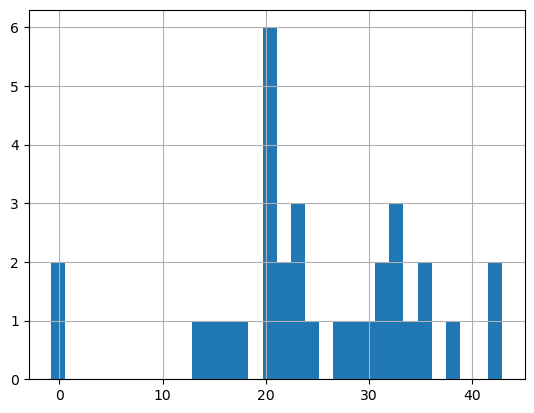

In [141]:
average_temperature.hist(bins=len(average_temperature))

Try some other values?

<AxesSubplot: >

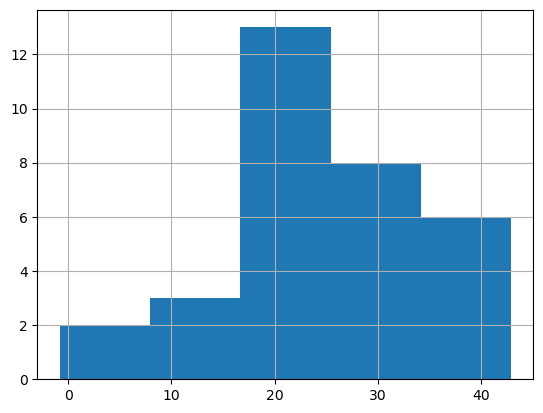

In [142]:
average_temperature.hist(bins=5)

Looks somewhat like a bell curve? Let's revisit the empirical rules we came across in the lecture. 

If you plot your data based on frequency and it looks "normal" 
- about 68% of data within 1 standard dev. of mean
- about 95% of data within 2 standard dev. of mean
- all or nearly all data within 3 standard dev. of mean

**Insights:** In our case `mean + 2*stdev ~ 44F` which represents the fact that ~68% of the time we will have temperature less than 44F. So we can confidently say that on any day in the month of January 2023, if we planned a visit to Estes Park, we would have had to do a lot of winter prep. 

## E1. Exercise: Describe and Plot Histogram for "Average humidity"

What Can you try different bin sizes for the histogram? What insights do you get?

Imported all libraries successfully...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               32 non-null     int64  
 1   Average and Extremes     32 non-null     object 
 2   Average temperature      32 non-null     float64
 3   Average humidity         32 non-null     float64
 4   Average dewpoint         32 non-null     float64
 5   Average barometer        32 non-null     float64
 6   Average windspeed        32 non-null     float64
 7   Average gustspeed        32 non-null     float64
 8   Average direction        32 non-null     object 
 9   Rainfall for month       32 non-null     object 
 10  Rainfall for year        32 non-null     object 
 11  Maximum rain per minute  32 non-null     object 
 12  Maximum temperature      32 non-null     object 
 13  Minimum temperature      32 non-null     ob

,Unnamed: 0,Average and Extremes,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,...,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
0,0,Jan 1,33.4,38.0,10.2,29.6,9.8,14.7,216° ( SW),0.00 in.,...,0.00 in. on day 01 at time 00:00,37.0°F on day 01 at time 13:49,29.7°F on day 01 at time 07:26,44% on day 01 at time 22:19,29% on day 01 at time 10:18,29.663 in. on day 01 at time 07:44,29.467 in. on day 01 at time 14:29,23.0 mph on day 01 at time 12:17,34.5 mph from 203 °(SSW) on day 01 at time 1...,37.0°F on day 01 at time 13:49
1,1,Jan 2,28.5,57.0,14.1,29.7,7.2,10.9,212° (SSW),0.01 in.,...,0.01 in. on day 02 at time 11:21,35.0°F on day 02 at time 13:56,12.1°F on day 02 at time 23:50,85% on day 02 at time 22:48,34% on day 02 at time 15:40,30.006 in. on day 02 at time 22:44,29.484 in. on day 02 at time 00:30,23.0 mph on day 02 at time 15:28,34.5 mph from 225 °( SW) on day 02 at time 1...,35.0°F on day 02 at time 13:56
2,2,Jan 3,16.8,82.0,12.2,30.2,1.0,1.8,270° ( W ),0.01 in.,...,0.00 in. on day 03 at time 23:59,23.9°F on day 03 at time 23:59,10.7°F on day 03 at time 00:17,84% on day 03 at time 10:22,73% on day 03 at time 23:59,30.308 in. on day 03 at time 10:59,30.005 in. on day 03 at time 00:01,11.5 mph on day 02 at time 00:37,16.1 mph from 270 °( W ) on day 03 at time 0...,23.9°F on day 03 at time 23:59
3,3,Jan 4,12.6,76.0,6.6,30.0,3.8,5.7,281° ( W ),0.01 in.,...,0.00 in. on day 04 at time 23:59,25.6°F on day 04 at time 07:54,-2.2°F on day 04 at time 23:59,85% on day 04 at time 07:12,68% on day 04 at time 02:26,30.150 in. on day 04 at time 22:58,29.750 in. on day 04 at time 13:44,13.8 mph on day 04 at time 16:34,17.3 mph from 293 °(WNW) on day 04 at time 1...,25.6°F on day 04 at time 07:54
4,4,Jan 5,-2.4,72.0,-9.2,30.3,1.2,2.0,275° ( W ),0.01 in.,...,0.00 in. on day 05 at time 23:59,3.7°F on day 05 at time 13:09,-12.8°F on day 05 at time 23:59,74% on day 05 at time 14:43,67% on day 05 at time 23:58,30.450 in. on day 05 at time 23:43,30.131 in. on day 05 at time 01:43,6.9 mph on day 05 at time 13:53,8.1 mph from 293 °(WNW) on day 05 at time 16:29,3.7°F on day 05 at time 13:09


Index(['Unnamed: 0', 'Average and Extremes', 'Average temperature',
       'Average humidity', 'Average dewpoint', 'Average barometer',
       'Average windspeed', 'Average gustspeed', 'Average direction',
       'Rainfall for month', 'Rainfall for year', 'Maximum rain per minute',
       'Maximum temperature', 'Minimum temperature', 'Maximum humidity',
       'Minimum humidity', 'Maximum pressure', 'Minimum pressure',
       'Maximum windspeed', 'Maximum gust speed', 'Maximum heat index'],
      dtype='object')
0     38.0
1     57.0
2     82.0
3     76.0
4     72.0
5     52.0
6     29.0
7     54.0
8     75.0
9     58.0
10    77.0
11    74.0
12    69.0
13    71.0
14    79.0
15    83.0
16    65.0
17    57.0
18    32.0
19    48.0
20    61.0
21    39.0
22    66.0
23    61.0
24    46.0
25    35.0
26    32.0
27    33.0
28    32.0
29    30.0
30    25.0
31    55.0
Name: Average humidity, dtype: float64


count    32.000000
mean     55.093750
std      18.123874
min      25.000000
25%      37.250000
50%      57.000000
75%      71.250000
max      83.000000
Name: Average humidity, dtype: float64

<AxesSubplot:>

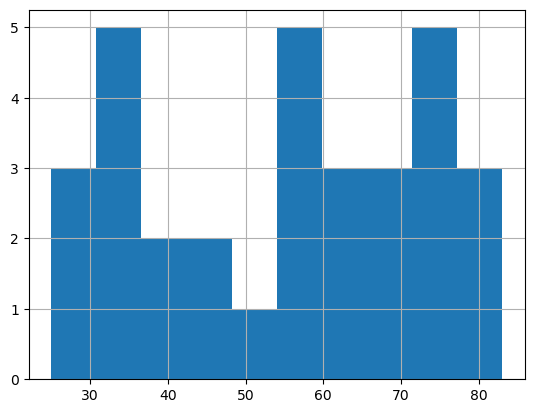

In [10]:
#0
try:
    import pandas as pd
    import numpy as np
    import scipy
    from matplotlib import pyplot as plt
    print ("Imported all libraries successfully...")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} scipy
    print ("Some libraries not found, installing...")
    
#1
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

estes_park_df = pd.read_csv("EstesPark_Weather_January_2023.csv")

estes_park_df.info()

#2
estes_park_df.head()

#3
column_names = estes_park_df.columns
print (column_names)

average_humidity = estes_park_df["Average humidity"]
print (average_humidity)

#4
average_humidity.describe()

#5
average_humidity.hist(bins=10)


<AxesSubplot:>

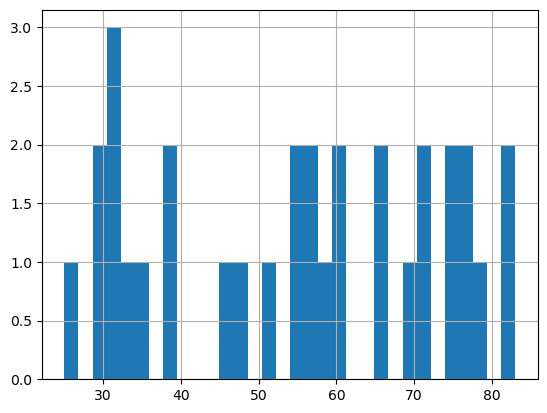

In [11]:
#6
average_humidity.hist(bins=len(average_humidity))

<AxesSubplot:>

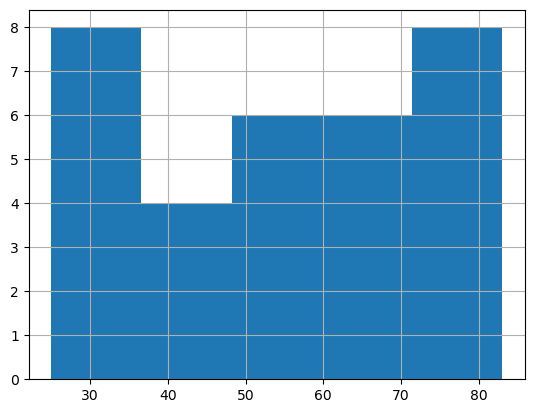

In [12]:
#7
average_humidity.hist(bins=5)

The plot with 10 bins best represents the data. The trend is clearly seen compared to the rest of the plots. Days with humidity of 50 are rare while there are most days where the humidity is near 30 or 70.

## 3.2. Bivariate Analysis
We are going to study the association between two columns (i.e., two variables). For this we compute the Pearson correlction coefficient between two variables. 

Let's say our two variables of choice are (a) Average windspeed and (b) Average gustspeed.

In [143]:
from scipy.stats import pearsonr

p = pearsonr(estes_park_df["Average windspeed"],estes_park_df["Average gustspeed"])
print (p[0])

0.9986067307768813


**Insight:** The first value above represents the corelation coefficient, whcih is ~**0.998**. This means windspeed is strongly correlated with gust speed, which is expected. 

Now let's try to extract a correlation matrix for all the **numerical columns**

**Insights:**
- Temperature and humidity are strongly "negatively" correlated at -0.578 which indicates that as the temperature (especially in the cold weather in January 2023) rises, it will probably result in a less humid atmosphere.
- Temperature and pressure are strongly "negatively" correlated at -0.482231 which indicates that a rise in temperature will reduce atmospheric pressure, which is expected. 
- Humidity and dew points are very weakly correlated at 0.101796 and it appears that there is no relationship between them. (Is this expected?)

Any other insights?

## 4. Data visualization

## 4.1. Bar Graphs
A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. 

In the above data, the only categorical data is "Date" (we are of-course ignoring the  unprocessed columns from Average direction onwards).

Say we want to plot Average Temperature for **five random dates**, without maintaining sequentiality. We can go for a bar graph.


<BarContainer object of 5 artists>

Text(0.5, 0, 'Date')

Text(0, 0.5, "Average per-day temperature in 'F")

Text(0.5, 1.0, 'Temperature for 5 random days January 2023')

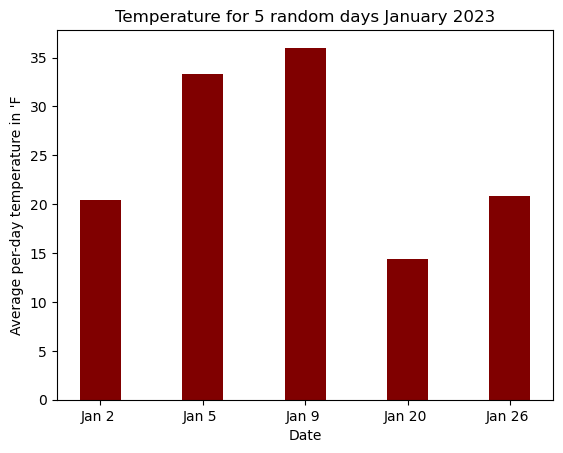

In [144]:
five_random_days = [1,4,8,19,25]

date_column = estes_park_df["Average and Extremes"]
temp_column = estes_park_df["Average temperature"]

selected_dates = []
selected_temps = []

for day_id in five_random_days:
    selected_dates.append(date_column[day_id])
    selected_temps.append(temp_column[day_id])
    

# Now plot our bar graph
plt.bar(selected_dates, selected_temps, color ='maroon', width = 0.4)

# Now add axis labels with units
plt.xlabel("Date")
plt.ylabel("Average per-day temperature in 'F")

# We can add a title too
plt.title("Temperature for 5 random days January 2023")


## 4.2. Line Graphs

- Best used when the x-axis represents a sequence (e.g., time) and y-axis is a continuous numerical variable.

We can approximate days in January 2023 as a representation of sequentiality (time) and plot temperature-vs-day as a line graph

Text(0.5, 0, 'Day number')

Text(0, 0.5, "Average per-day temperature in 'F")

Text(0.5, 1.0, 'Temperature progression in January 2023')

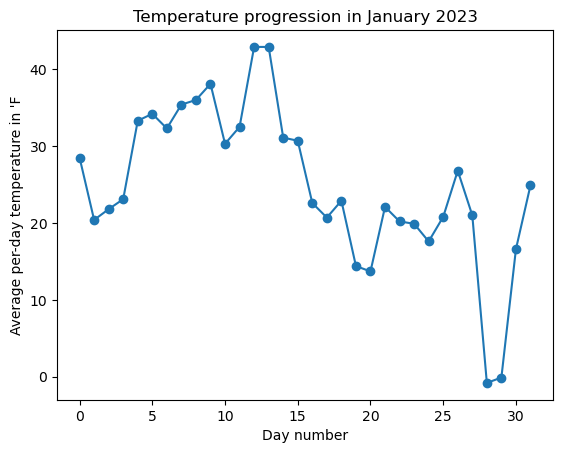

In [145]:
day_ids = range(len(date_column)) # creates a variable 0,1,2...total_days
temp_column = estes_park_df["Average temperature"]

plt.plot(day_ids,temp_column, marker='o')

plt.xlabel("Day number")
plt.ylabel("Average per-day temperature in 'F")

# We can add a title too
plt.title("Temperature progression in January 2023")

## 4.3. Scatter Plots

- Best for representing relationship between two continuous variables
- Can add third continuous variable represented by marker size
- Can add categorical information by changing marker color

Let's plot windspeed and gust speed together. 

Text(0.5, 0, 'Average windspeed (in mph)')

Text(0, 0.5, 'Average gustspeed (in mph)')

Text(0.5, 1.0, 'gustspeed-vs-windspeed in January 2023')

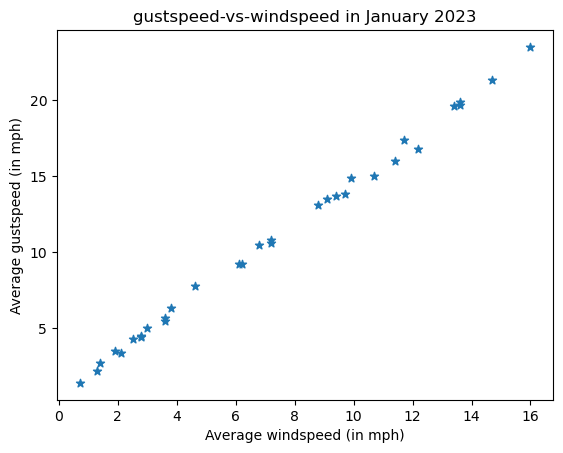

In [146]:
windspeed_column = estes_park_df["Average windspeed"]
gustspeed_column = estes_park_df["Average gustspeed"]

plt.scatter(windspeed_column,gustspeed_column, marker="*")

plt.xlabel("Average windspeed (in mph)")
plt.ylabel("Average gustspeed (in mph)")

# We can add a title too
plt.title("gustspeed-vs-windspeed in January 2023")

Does this corroborate with our correlation analysis in 3.2?

Now let's draw a scatter plot considering three variables where the third variable is represented by marker size. The variables are:

- Average temperature
- Average pressure (barometer)
- Average humidity

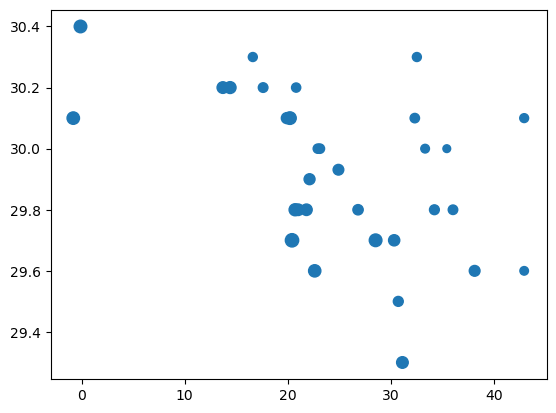

In [147]:
temp_column = estes_park_df["Average temperature"]
pressure_column = estes_park_df["Average barometer"]
humidity_column = estes_park_df["Average humidity"]

plt.scatter(temp_column, pressure_column, marker="o", s=humidity_column)

## 4.4. Box Plots
- A Box Plot is also known as Whisker plot is created to display the summary of the set of data values for a variable 
- Properties like minimum, first quartile, median, third quartile and maximum. 
- Also plots outliers

Let's plot Average temperature using boxplot.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb91a103220>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb91a103760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb91a102f80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb91a103cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb91a103f70>],
 'means': []}

Text(0.5, 0, 'Temperature')

Text(0, 0.5, "Temp in 'F")

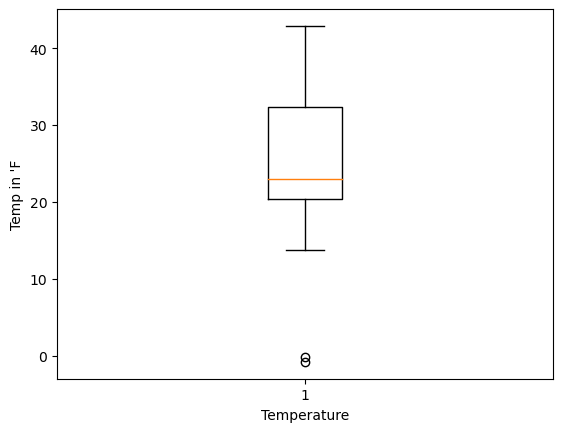

In [148]:
temp_column = estes_park_df["Average temperature"]

plt.boxplot(temp_column)

plt.xlabel("Temperature")
plt.ylabel("Temp in 'F")

## E2. Exercise: IMDB Movie Data

- Download the IMDB Movie Data (extracted from Kaggle's IMDB Movie Dataset posting) from **Canvas->Files->Week6->IMDB_movie_metadata_small.csv**
- Load the data to a Pandas dataframe using read_csv() method 
- Which columns are categorical and which ones are numerical? Write in a markdown block.
- Describe columns "gross" (represents total revenue made by the movie) and "imdb_score" using describe(). Write your insights in a markdown block.
- Analyze "imdb_score" and "gross" together by computing the Pearson's correlation coefficient. What does it tell you? Write down in a markdown block.
- Plot "gross" vs "director_name" for the **first 10 rows**. Which form of plot are you going to use?
- Plot "imdb_score"-vs-"movie_facebook_likes". Which form of plot are you going to use?
- Boxplot "gross" and write down your insights from the box plot. 



In [16]:
#0
try:
    import pandas as pd
    import numpy as np
    import scipy
    from matplotlib import pyplot as plt
    print ("Imported all libraries successfully...")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} scipy
    print ("Some libraries not found, installing...")
    
#1
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

IMDB_movie_df = pd.read_csv("IMDB_movie_metadata_small.csv")

IMDB_movie_df.info()

Imported all libraries successfully...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Movie_ID              3752 non-null   int64  
 1   director_name         3752 non-null   object 
 2   imdb_score            3752 non-null   float64
 3   movie_facebook_likes  3752 non-null   int64  
 4   gross                 3752 non-null   float64
 5   title_year            3752 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 176.0+ KB


The categorical variable is director name 
The numerical variables are movie id, imdb score, movie facebook likes, gross, and title year

In [23]:
column_names = IMDB_movie_df.columns
print (column_names)

gross = IMDB_movie_df["gross"]
print (gross)

gross.describe()

column_names = IMDB_movie_df.columns
print (column_names)

imdb_score = IMDB_movie_df["imdb_score"]
print (imdb_score)

imdb_score.describe()


Index(['Movie_ID', 'director_name', 'imdb_score', 'movie_facebook_likes',
       'gross', 'title_year'],
      dtype='object')
0       760505847.0
1       309404152.0
2       200074175.0
3       448130642.0
4        73058679.0
           ...     
3747       136007.0
3748       673780.0
3749       424760.0
3750      2040920.0
3751        85222.0
Name: gross, Length: 3752, dtype: float64


count    3.752000e+03
mean     5.241706e+07
std      6.996881e+07
min      1.620000e+02
25%      8.216464e+06
50%      3.007156e+07
75%      6.674881e+07
max      7.605058e+08
Name: gross, dtype: float64

Index(['Movie_ID', 'director_name', 'imdb_score', 'movie_facebook_likes',
       'gross', 'title_year'],
      dtype='object')
0       7.9
1       7.1
2       6.8
3       8.5
4       6.6
       ... 
3747    6.9
3748    7.5
3749    7.0
3750    6.9
3751    6.6
Name: imdb_score, Length: 3752, dtype: float64


count    3752.000000
mean        6.464819
std         1.056651
min         1.600000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.300000
Name: imdb_score, dtype: float64

All of the descriptives of the gross is much higher than the imdb scores. This is because of the nature of the two categories. THe standard deviation of gross is much higher indicating that the values are more spread out while, the values for imdb scores are much more clustered with a lower standard deviation.

In [25]:
from scipy.stats import pearsonr

p = pearsonr(IMDB_movie_df["gross"],IMDB_movie_df["imdb_score"])
print (p[0])

0.2141628231975331


0.2 is a low correlation coefficient indicating that there is very low(almost none) correlation between these two values.

<BarContainer object of 10 artists>

Text(0.5, 0, 'Diretor names')

Text(0, 0.5, 'Gross')

Text(0.5, 1.0, 'Gross vs director name for first ten directors')

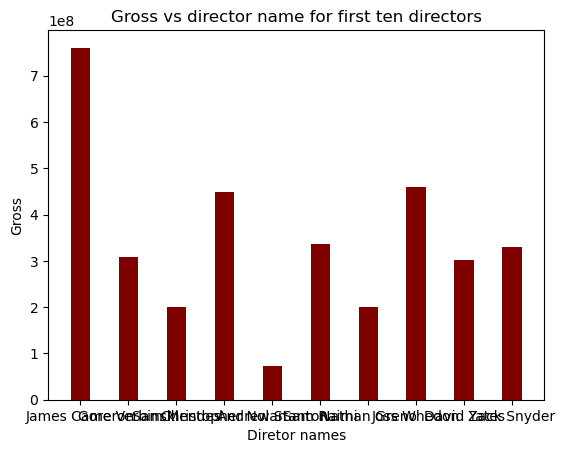

In [32]:
first_ten_days = [0,1,2,3,4,5,6,7,8,9]

director_name_column = IMDB_movie_df["director_name"]
gross_column = IMDB_movie_df["gross"]

selected_names = []
selected_gross = []

for day_id in first_ten_days:
    selected_names.append(director_name_column[day_id])
    selected_gross.append(gross_column[day_id])
    

# Now plot our bar graph
plt.bar(selected_names, selected_gross, color ='maroon', width = 0.4)

# Now add axis labels with units
plt.xlabel("Diretor names")
plt.ylabel("Gross")

# We can add a title too
plt.title("Gross vs director name for first ten directors")

Text(0.5, 0, 'IMDB score')

Text(0, 0.5, 'Facebook likes')

Text(0.5, 1.0, 'IMDB score vs Facebook likes')

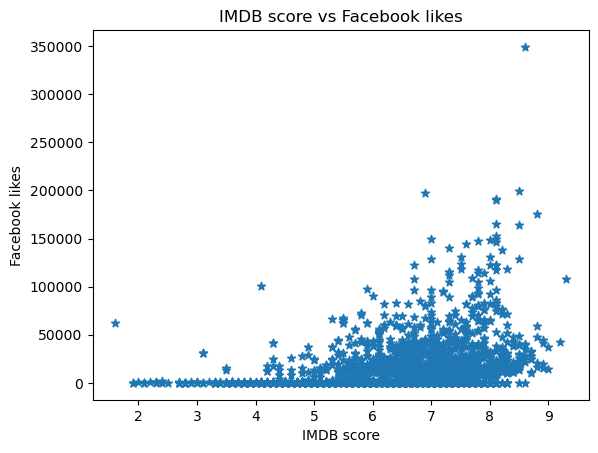

In [33]:
imdb_score_column = IMDB_movie_df["imdb_score"]
facebook_likes_column = IMDB_movie_df["movie_facebook_likes"]

plt.scatter(imdb_score_column,facebook_likes_column, marker="*")

plt.xlabel("IMDB score")
plt.ylabel("Facebook likes")

# We can add a title too
plt.title("IMDB score vs Facebook likes")

{'whiskers': [<matplotlib.lines.Line2D at 0x177b8e6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x177b8ec40>,
 'boxes': [<matplotlib.lines.Line2D at 0x177b8e3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x177b9b220>],
 'fliers': [<matplotlib.lines.Line2D at 0x177b9b4f0>],
 'means': []}

Text(0.5, 0, 'Gross')

Text(0, 0.5, 'Total revenue')

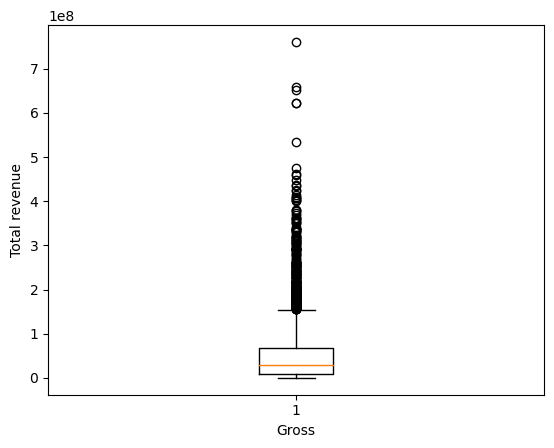

In [35]:
gross_column = IMDB_movie_df["gross"]

plt.boxplot(gross_column)

plt.xlabel("Gross")
plt.ylabel("Total revenue")

The boxplot above has a lot of outliers, meaning that there are a lot of descriptancy when it comes to revenue. The high end of revenue is significantly higher than the max value.

## [Optional] Pro-tip: Go through Seaborn tutorial 

Seaborn is a library mostly used for statistical plotting in Python. It is built on top of Matplotlib and provides beautiful default styles and color palettes to make statistical plots more attractive.

Tutorial here:

https://www.geeksforgeeks.org/python-seaborn-tutorial/